# Assignment 2: ICP and Pose Graph Optimisation

Roll number: 2019101068

# Instructions

- Code must be written in Python in Jupyter Notebooks. We highly recommend using an anaconda distribution or at the minimum, virtual environments for this assignment. 
- Save all your results in ```results/<question_number>/<sub_topic_number>/```
- You are not allowed to use any external libraries (other than ones being imported below). You can import functions provided in helper library, if any.
- Make sure any extra files that you need to submit are placed in the *'results'* folder.
- Answer the descriptive questions in your own words with context & clarity. Do not copy answers from online resources or lecture notes.
- The **deadline** for this assignment is on **14/09/2022 at 11:55pm**. Please note that there will be no extensions.
- Plagiarism is **strictly prohibited**.


In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
import open3d as o3d
import copy
import seaborn as sns
from matplotlib.image import imread

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# 1. Iterative Closest Point

In this subsection, you have to code the Iterative Closest Point algorithm to find the alignment between two point clouds **with and without known correspondences**. Writing modular code will be helpful to you later.


## 1.2: ICP Alignment

### todo: 1

1. Convert RGBD data to a corresponding point cloud. Check folder  `data/1/2/` for two different RGBD data.
    - Refer `helpers/pcd_from_rgbd.py` to compute the same. You need not understand it right now, as it'll get covered in later lectures.
    - Use file `data/1/2/camera_param.txt` for focalX, focalY, centerX, centerY, scaling factor values repectively.


In [2]:
import importlib

In [3]:
import mr_utils
importlib.reload(mr_utils)

<module 'mr_utils' from '/home/anmolagarwal/Desktop/mr_assignment_2/mr_utils.py'>

In [4]:
import helpers.pcd_from_rgbd

In [5]:
rgb_img_paths = ["data/1/2/rgbd1/533.jpg","data/1/2/rgbd2/729.jpg"]
depth_img_paths = ["data/1/2/rgbd1/533.png","data/1/2/rgbd2/729.png" ]
pcd_save_paths=["./saved_pcd_data/pcd_1.pcd","./saved_pcd_data/pcd_2.pcd" ]

    

In [6]:
img = imread(rgb_img_paths[1])

#### The image has (800, 800) pixels

In [7]:
img.shape

(800, 800, 3)

## EXP

#### Taking backup to verify that final translation and rotation are being calculated correctly

In [8]:
icp_obj = mr_utils.icp_pcl(pcd_save_paths[0], pcd_save_paths[1], downsample=True)

pcd 1 has 30362 points
pcd 2 has 19636 points
Before initial rotation and translation
After initial rotation and translation


In [9]:
pcd_1_pts_backup = copy.deepcopy(np.asarray(icp_obj.pcd1.points))

In [10]:
icp_obj.start_icp()

Current itr number is  1
Frob norm is  1452806.1125127308
Chamfer is  2274478.615559538
term 1 is  1452806.1125127308
term 2 is  821672.5030468074
###########
Current itr number is  2
Frob norm is  1129121.8161311087
Chamfer is  2018856.578634944
term 1 is  1129121.8161311087
term 2 is  889734.7625038354
###########
Current itr number is  3
Frob norm is  1003481.8161649917
Chamfer is  1934145.1461441165
term 1 is  1003481.8161649917
term 2 is  930663.3299791248
###########
Current itr number is  4
Frob norm is  938367.3599531465
Chamfer is  1900436.8563510305
term 1 is  938367.3599531465
term 2 is  962069.4963978841
###########
Current itr number is  5
Frob norm is  885557.493110476
Chamfer is  1877180.6352367494
term 1 is  885557.493110476
term 2 is  991623.1421262736
###########
Current itr number is  6
Frob norm is  825489.2255887131
Chamfer is  1849795.9704788635
term 1 is  825489.2255887131
term 2 is  1024306.7448901505
###########
Current itr number is  7
Frob norm is  762485.987

In [11]:
#a=icp_obj.pcd1.voxel_down_sample(voxel_size=200)

In [12]:
#a

In [13]:
o3d.visualization.draw_geometries([icp_obj.pcd1, icp_obj.pcd2, icp_obj.cf1, icp_obj.cf2])

In [14]:
np.asarray(icp_obj.pcd1.points).shape[1]

3

In [15]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

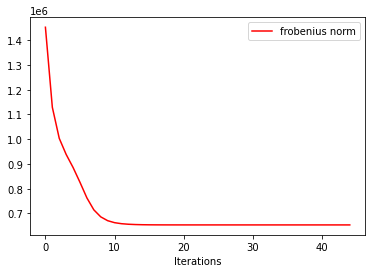

In [16]:
plt.plot(icp_obj.frob_history,color='r',label="frobenius norm")
plt.xlabel("Iterations")
plt.legend()

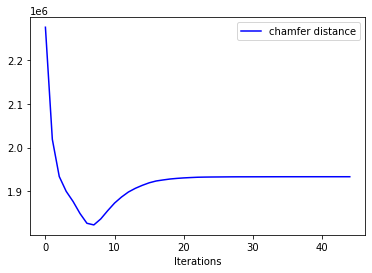

In [17]:
plt.plot(icp_obj.chamfer_history,color='b',label='chamfer distance')
plt.xlabel("Iterations")
plt.legend()

In [18]:
#icp_obj.final_rot

In [19]:
#icp_obj.final_trans

#### Final transformation matrix is :

In [20]:
icp_obj.final_transf

array([[ 7.55715296e-01,  1.16650461e-01,  6.44427701e-01,
         2.51385827e+04],
       [-5.54801158e-02,  9.91874884e-01, -1.14482184e-01,
        -1.51708215e+03],
       [-6.52546050e-01,  5.07630137e-02,  7.56046803e-01,
        -9.61356807e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [21]:
pcd_1_pts_now = copy.deepcopy(np.asarray(icp_obj.pcd1.points))

In [22]:
pcd_1_pts_backup = np.append(pcd_1_pts_backup, np.ones((1, pcd_1_pts_backup.shape[0])).T, axis=1)

In [23]:
pcd_1_pts_now_exp = icp_obj.final_transf@pcd_1_pts_backup.T

In [24]:
pcd_1_pts_now_exp = pcd_1_pts_now_exp.T

In [25]:
b=np.array(pcd_1_pts_now_exp)

In [26]:
for idx ,row in enumerate(b):
    
    ans=row/row[-1]
    b[idx]=ans
    #print(ans)

In [27]:
b = b[:, :-1]

In [28]:
np.unique(np.isclose(b, pcd_1_pts_now))

array([ True])

In [31]:
icp_obj.pcd1

PointCloud with 30362 points.

In [32]:
icp_obj.pcd2

PointCloud with 19636 points.

### Saving pcls for backup


### todo:2
2. Write a function that takes two point clouds as input **without known correspondences** and performs the iterative closest point algorithm. **Assume a particular rotation and translation for initialization**. Mention it in the notebook itself.

### Ans: implementation done as a class `icp_pcl` in `mr_utils.py`


### todo:3
3. Perform the ICP alignment between the two point clouds and show their individual coordinate frames. Show a visualization of final alignment using `open3d`.




### todo: 4
4. Display the achieved alignment error(can show frobenius norm of the two point clouds) and final transformation matrix. Don't forget to log the initial alignment error as well. Also compute the **chamfer distance** between the two clouds.



### todo: 5
5. Perform `steps 1-4` for the data in the `data/1/2/rgbd1` and `data/1/2/rgbd2` folders.




### todo: 6
6. Mention the challenges that one can face to compute transformations between the ground-truth point clouds obtained from `rgbd1` and `rgbd2` data via the ICP function you wrote. 

**Ans:**
There are several reasons. A lot of them have been described in detail in answer to `todo 7`. For this particular case, the main one I think is the incorrect correspondences. This is because the points are so dense, that using the nearest-neighbour based approach for finding correspondence is working very poorly. Also, due to the large motion between the 2 scenes has become another reason for finding poor correspondence. 

### TODO: 7
#### Does ICP always give the correct alignment? Why or Why not? 

Ans: ICP DOES not always give correct alignment. Some of the reasons may be:

**Reason 1)** There is always noise in the sensor readings. As a result, a perfect solution (with zero error) may NOT exist.

**Reason 2)** The Lidar/sensor may not always read the exact same point.
Imagine a table kept in front of the robot with 4 edges. It is possible that for the first time, the lidar captures only the 2 diagnal edges and in the next frame, it captures only the 2 off-diagonal edges. In such a case, a correspondence DOES not exist at all for these 4 points in the opposite point cloud. The reason for this might be the low resolution of the lidar. **{Soln: Point to plane ICP}**

**Reason 3)** Incorrect finding of correspondences. 
ICP will fail miserably if the incorrect correspondences are detected. 

**Reason 4)** There has been a large motion of one point cloud with respect to another.
One possible solution can be for a human to eyeball and provide a good initial rotation and translation which gets the two point clouds pretty close to another.

### TODO: 8
#### What are other variants of ICP and what are their advantages (you can look at point to plane ICP)?

Some of the places where one can do better:

1) Selecting the points
* Using all points
* Uniform-subsampling (to prevent less density)
* Random sampling
* Feature based sampling (ENsuring that the points which are chosen are diverse will make it easier to choose correspondences later on. features can include the color captured via a RGB camera.) 
![alt text](helper_images/feature.png "Title")
* **Normal space sampling** (This ensures that surfaces have normals as uniformly distributed as possible). The intuition behind this is that: surfaces with a higher curvature are more suitable for alignment

![alt text](helper_images/sampling_mech.png "Title")

2) Weighting the correspondences
* This may be assigned based on sensor uncertainity
* Eg: assign lower wt for points wiith higher point-point distances
* Determine transformation which minimzes the weighted error function 
* Eg: in stereo camera, uncertainity is higher for points at a larger depth

3) Rejecting outlier points (whose distance to their correspondence is greater than a threshold)

4) Change data association strategy
* Normal shooting: project along normal and find closest point to normal
![alt text](helper_images/normal.png "Title")
* weight compatibility of points based on normals, curvature, colors etc:


5) **Change error metric (Eg: Point to plane ICP)**: this is mainly to mitigate REASON 3 mentioned aboe.
Here, we minimze the sum of squared distances between a point and the tangent plane at its correspondence point.
![alt text](helper_images/plane.png "Title")

**Example case:**

Let p1 and p4 lie on a surface.
Let P2 ,p3, p5 and p6 lie on another surface.
Her,e ideally, P1<->P3 and P4<->P6. However, due to low sampling frequency of the scanner, it is possible that P3 and P5 are not captured at all, As a result, the correspondences are off. POINT TO PLANE ICP can help us capture the proper distances.

Ref for some of the points above: Lecture by Stachniss on ICP